**EDA**

Health insurance clients are potential clients for vihicle insurance, but offering vihicle insurance to all of health insurance clients will be innefective
We need to classify which health insurance client that has a decent probability in taking vihicle insurance, in order to make the sales offers more effective

**Conclusion**

- Male are slightly more likely to take the insurance, with 13.8% chance
- Middle aged person (35-45) has 21.5% chance on taking the insurance, followed by senior adult (45-60) with 18.7% chance
- Person without driving licensed are very unlikely to take the insurance
- Current vihicle insurance client are very unlikely to have another vihicle insurance
- Person with vihicle damage has 12.00% chance on taking the insurance, compared to 0.26% on person without vihicle damage

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [17]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [19]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [20]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [21]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [22]:
df.describe(include='O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [23]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


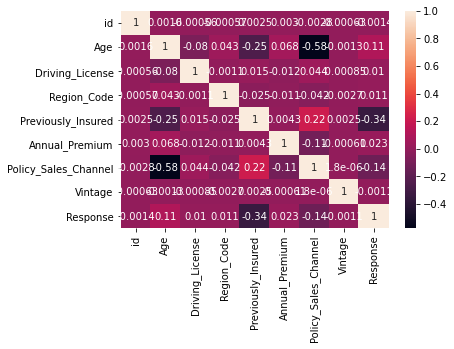

In [24]:
sns.heatmap(df.corr(), annot=True)

In [25]:
df.drop(columns=['id'], inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


**Checking Data Distribution and Outliers**

AxesSubplot(0.125,0.125;0.775x0.755)


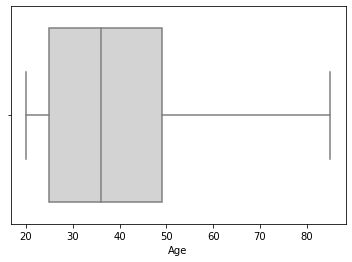

In [27]:
print(sns.boxplot(df['Age'], color='lightgrey'))

AxesSubplot(0.125,0.125;0.775x0.755)


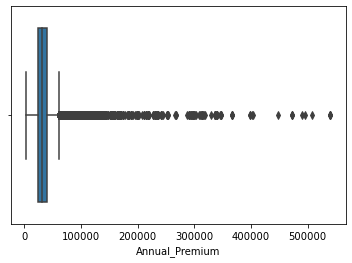

In [28]:
print(sns.boxplot(df['Annual_Premium']))

**Handling Outliers**

Dropping outliers is not necessary

**Checking Data Target**

Response Percentage

In [29]:
(pd.crosstab(index=df['Response'], columns='count', normalize=True)*100).round(2)

col_0,count
Response,
0,87.74
1,12.26


In [30]:
(pd.crosstab(index=df['Response'], columns=df['Driving_License'], normalize=True)*100).round(2)

Driving_License,0,1
Response,,
0,0.20,87.54
1,0.01,12.25


In [31]:
(pd.crosstab(index=df['Response'], columns=df['Previously_Insured'], normalize=True)*100).round(2)

Previously_Insured,0,1
Response,,
0,41.96,45.78
1,12.21,0.04


In [32]:
(pd.crosstab(index=df['Response'], columns=df['Vehicle_Damage'], normalize=True)*100).round(2)

Vehicle_Damage,No,Yes
Response,,
0,49.25,38.49
1,0.26,12.00


In [33]:
(pd.crosstab(index=df['Response'], columns=df['Gender'], normalize=True)*100).round(2)

Gender,Female,Male
Response,,
0,41.15,46.59
1,4.77,7.48


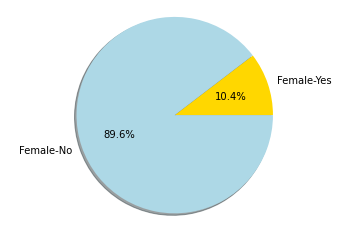

In [34]:
labels = 'Female-Yes', 'Female-No'
sizes = [4.77, 41.15]
colors = ['gold', 'lightblue']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

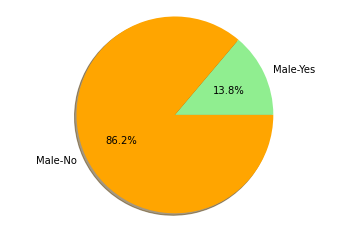

In [35]:
labels = 'Male-Yes', 'Male-No'
sizes = [7.48, 46.59]
colors = ['lightgreen', 'orange']

# Plot
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

In [36]:
age_bin = [20, 35, 45, 60, df['Age'].max()] ## Menentukan Kelompok Usia
labels = ['Young Adult', 'Middle Aged', 'Senior Adult', 'elder'] ## memberi nama pada kelompok usia
df['age_bin'] = pd.cut(df['Age'], bins=age_bin, labels = labels)
((df[['age_bin', 'Response']].groupby(['age_bin']).mean())*100).sort_values(by='Response', ascending=False)

,Response
age_bin,
Middle Aged,21.539160
Senior Adult,18.731838
elder,9.688013
Young Adult,6.686233
